In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
Data = np.loadtxt('../source/sms.dat', delimiter = " ", dtype = str, skiprows = 1)
N, dp1 = Data.shape
d = dp1 - 1
print N, d

5574 560


In [22]:
print np.count_nonzero(Data[:, -1] == 'ham')
print np.count_nonzero(Data[:, -1] == 'spam')

4827
747


In [23]:
X = np.zeros((N, d), dtype = int)
X[Data == 'yes'] = 1
y = np.zeros((N), dtype = int)
y[Data[:, -1] == 'spam'] = 1

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 560 but corresponding boolean dimension is 561
  from ipykernel import kernelapp as app


In [24]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
#from sklearn.naive_bayes import MultinomialNB
#nb_model = MultinomialNB()
#nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
#from sklearn.naive_bayes import GaussianNB
#nb_model = MultinomialNB()
#nb_model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)

print np.mean(y_train_pred != y_train)
print np.mean(y_test_pred != y_test)

0.0255980861244
0.025824964132


In [29]:
from sklearn.metrics import confusion_matrix
CF = confusion_matrix(y_test_pred, y_test)
print CF

[[1182   20]
 [  16  176]]


$
\begin{array}{|c|c|}
\hline
{\rm TN} & {\rm FN} \\
\hline
{\rm FP} & {\rm TP} \\
\hline
\end{array}
$

${\rm TN}$ – true negative
${\rm FP}$ – false positive
${\rm FN}$ – false negative
${\rm TP}$ – true positive


${\rm FP}$ – _ложные тревоги_ (ошибки 1-го рода или $\alpha$-ошибки)

${\rm FN}$ – _промахи_ (ошибки 2-го рода или $\beta$-ошибки)

$\alpha = {\rm FPR} = \frac{{\rm FP}}{{\rm TN}+{\rm FP}}$ – вероятность ошибки первого рода (_уровень значимости_)

$\beta = {\rm FNR} = \frac{{\rm FN}}{{\rm FN}+{\rm TP}}$ – вероятность ошибки второго рода

${\rm TNR} = \frac{{\rm TN}}{{\rm TN}+{\rm FP}} = 1 - {\rm FPR}$ – _специфичность_ (вероятность предсказать болезнь, при условии, что она есть)

${\rm TPR} = \frac{{\rm TP}}{{\rm FN}+{\rm TP}} = 1 - {\rm FNR}$ – _чувствительность_ (вероятность предсказать отсутствие болезни, при условии, что ее нет)


In [18]:
fpr = float(CF[1, 0])/(CF[0, 0] + CF[1, 0])
fnr = float(CF[0, 1])/(CF[0, 1] + CF[1, 1])
print fpr, fnr

0.00417362270451 0.132653061224


In [19]:
tnr = 1 - fpr
tpr = 1 - fnr
print tnr, tpr

0.995826377295 0.867346938776


## ROC-кривая

In [10]:
from sklearn.metrics import roc_curve
proba = nb_model.predict_proba(X_test)[:, 1]

In [11]:
nb_model.predict_proba(X_test).shape

(1394L, 2L)

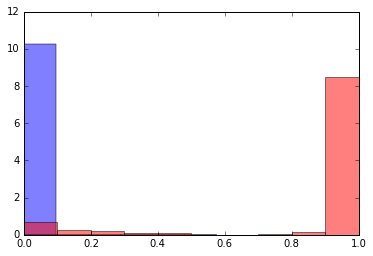

In [12]:
plt.hist(proba[y_test == 0], color = 'b', alpha = 0.5, normed = True)
plt.hist(proba[y_test == 1], color = 'r', alpha = 0.5, normed = True)
pass

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, proba)

In [14]:
fpr.shape

(229L,)

[-0.05, 1.05, -0.05, 1.05]

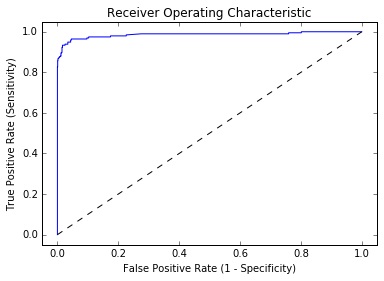

In [15]:
plt.title('Receiver Operating Characteristic')
plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
#plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.05, 1.05, -0.05, 1.05])

In [16]:
fpr_max = 0.025 # Зададим порог для fpr. Определим, чему должен быть равен tpr (fnr)
for i in range(len(thresholds) - 1):
    if fpr[i] <= fpr_max and fpr[i + 1] > fpr_max:
        print thresholds[i], fpr[i], 1-tpr[i]

0.0448527133665 0.0242070116861 0.0663265306122


In [17]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.98564358965622967